In [1]:
import glob
import string
import jsonlines
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from Utils import *

In [1]:
import csv

In [14]:
a = [   [   (538.9047849471724, 'Timeline_of_Class_I_railroads_-LRB-1930–76-RRB-'),
        (585.2736152764571, 'List_of_OMIM_disorder_codes'),
        (719.0892876340262, 'List_of_New_Jersey_street_railroads'),
        (   731.8164202842529, 'List_of_early_British_private_locomotive_manufacturers'),
        (1170.0539956279601, 'Mottos_and_halls_of_the_Livery_Companies')],
    [   (240.45713028928213, 'History_of_the_Roman_Constitution'),
        (248.72120298138088, 'List_of_New_Zealand_religious_leaders'),
        (322.4035862047103, 'List_of_New_Zealand_Catholic_bishops'),
        (330.88251923058965, 'List_of_Catholic_schools_in_New_York'),
        (665.0751920139902, 'History_of_Rome_-LRB-disambiguation-RRB-')],
    [   (532.1430476965566, 'Australian_performance_poetry'),
        (533.0483537165627, 'South_Asian_literature'),
        (629.7843629209235, 'Street_dance'),
        (973.4336164380805, 'Western_literature'),
        (1377.6612302411509, 'List_of_books_by_Jacob_Neusner')],
    [   (   115.67489278631777, 'List_of_bacterial_genera_named_after_personal_names'),
        (125.89586186566751, 'List_of_This_Is_Daniel_Cook_episodes'),
        (126.52087168100311, "MTV_New_Year's"),
        (135.59767639504818, 'Adrienne_-LRB-disambiguation-RRB-'),
        (146.4920601504039, 'Adrienne_Bailon')],
    [   (643.2615238842159, 'List_of_books_by_Jacob_Neusner'),
        (743.2473734535263, 'List_of_lichens_of_Maryland'),
        (1148.818074452144, 'Index_of_World_War_II_articles_-LRB-B-RRB-'),
        (1231.6682725520936, 'Index_of_World_War_II_articles_-LRB-W-RRB-'),
        (1825.17856666841, 'Index_of_World_War_II_articles_-LRB-L-RRB-')],
    [   (624.784529832894, 'List_of_libraries_in_19th-century_Boston'),
        (822.3346157169415, 'Index_of_World_War_II_articles_-LRB-T-RRB-'),
        (885.8128172110722, 'Pierre_Monteux_discography'),
        (908.8560219785213, 'List_of_botanical_gardens_in_Japan'),
        (1086.7777475669802, 'List_of_songs_about_Boston')],
    [   (   378.346582775325, 'Japan_Academy_Prize_for_Outstanding_Foreign_Language_Film'),
        (423.4158853715171, 'List_of_books_by_Jacob_Neusner'),
        (   457.27571329747013, 'List_of_baseball_parks_used_in_film_and_television'),
        (545.6266051166141, 'List_of_Ace_titles_in_numeric_series'),
        (958.9468212370657, 'Index_of_World_War_II_articles_-LRB-T-RRB-')],
    [   (233.17952794941, 'List_of_books_by_Jacob_Neusner'),
        (287.41858741012425, 'Index_of_World_War_II_articles_-LRB-L-RRB-'),
        (326.8871887141262, 'List_of_baronies_in_Portugal'),
        (340.204814920998, 'Index_of_World_War_II_articles_-LRB-B-RRB-'),
        (365.949755610244, 'Elektronorgtechnica')],
    [   (787.9149475300468, 'Defunct_placenames_of_New_Hampshire'),
        (798.4399868358504, 'Best_-LRB-surname-RRB-'),
        (947.6894825835692, 'List_of_accolades_received_by_An_Education'),
        (1168.9944987952654, 'List_of_Catholic_schools_in_New_York'),
        (   1186.0381809944338, 'List_of_awards_received_by_the_Chicago_Symphony_Orchestra')],
    [   (594.1168790556419, 'The_Hunger_Games'),
        (760.1048743422732, 'Index_of_World_War_II_articles_-LRB-T-RRB-'),
        (1115.4680302771535, 'List_of_video_game_crowdfunding_projects'),
        (1650.76028467175, 'List_of_Nintendo_DS_games'),
        (1790.4501375237955, 'List_of_PlayStation_3_games_released_on_disc')]]

In [15]:
ids_ = [75397, 150448, 214861, 156709, 129629, 33078, 6744, 226034, 40190, 76253]
with open("q2.csv", 'w') as f:
    for i in range(10):
        d = a[i]
        f.write(','.join([str(ids_[i])] + [d_[1] for d_ in d][::-1]) + '\n')

In [3]:
# Load documents and collect term frequencies
i_ = 0
tf = defaultdict(int)
fs = glob.glob(data_dir + wiki_dir + "*.jsonl")
punc_trans = str.maketrans('', '', string.punctuation)
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
                for w in l:
                    tf[w] += 1
    i_ += 1
    sys_print("\r" + str(i_))
tdist = sorted([(a, b) for (b, a) in list(tf.items())])[::-1]
y = [t[0] for t in tdist]

109

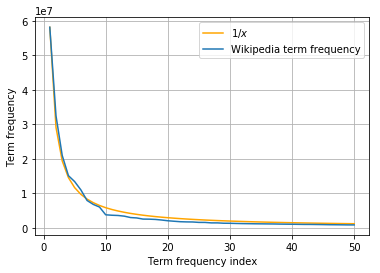

In [4]:
n_plot = 50
x = range(1, n_plot + 1)
plt.plot(x, [y[0] * (1 / x_) for x_ in x], label='1/$x$', color="orange")
plt.plot(x, y[:n_plot], label="Wikipedia term frequency")
plt.xlabel("Term frequency index")
plt.ylabel("Term frequency")
plt.grid()
plt.legend()
plt.savefig("graphs/zipf.pdf", filetype="pdf")
plt.show()

In [10]:
# Compute a quick estimate of the Zipf parameters using the averages of the top 1000 words
offs = 0
n_use = 1000
k = np.mean([i * y[:n_use][i - offs] for i in range(n_use)])
y_sum_ = sum(y[:n_use])
c = np.mean([i * y[:n_use][i - offs] / y_sum_ for i in range(n_use)])
s = 1 - (np.log(c) / np.log(y_sum_ / n_use))
print("Zipf parameters k, c, s =")
k, c, s

Zipf parameters k, c, s =


(65403067.2, 0.15822726384296681, 1.1425700705201083)

In [11]:
# Compute a more exact solution using maximum likelihood estimation, starting from the initial estimate
N_use = len(y)
x = np.asarray(range(1, len(y) + 1))
y_sum = sum(y)
p = np.asarray(y) / y_sum
zipf_lp = lambda rs, s: -(s * np.log(rs)) - np.log(np.sum(1 / (rs ** s)))
cost = lambda s: np.sum((np.log(p) - zipf_lp(x, s)) ** 2)
res = minimize(cost, s, bounds=[(0.1, 10.0)])
res

      fun: 410246.8771642777
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04074536])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 6
   status: 0
  success: True
        x: array([1.24499213])

In [12]:
s = res["x"]
c = np.mean(x * (1 / x ** s))
k = c * y_sum
print("Zipf parameters k, c, s =")
k, c, s

Zipf parameters k, c, s =


(20932453.403580662, 0.03152421501477323, array([1.24499213]))

In [13]:
claim_ids = [75397, 150448, 214861, 156709, 129629, 33078, 6744, 226034, 40190, 76253]
claims = []
claims_vocab = set()
with open(data_dir + "train.jsonl", 'r') as f:
    a = jsonlines.Reader(f)
    for a_ in a:
        if a_["id"] in claim_ids:
            claims.append(a_)
            claims[-1]["vocab"] = defaultdict(int)
            for w in a_["claim"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", ''). \
              translate(punc_trans).lower().split():
                claims[-1]["vocab"][w] += 1
                claims_vocab.add(w)

In [15]:
N_docs = 0
n_t = defaultdict(int)
i_ = 0
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            N_docs += 1
            entry = [[w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())]
            for w in set(sum(entry, [])):
                 if w in claims_vocab:
                    n_t[w] += 1
    i_ += 1
    sys_print("\r" + str(i_))
N_docs

109

5416536

In [23]:
# Load each document and measure cosine similarity
similarities = {}
i_ = 0
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            doc_tf = defaultdict(int)
            for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
                for w in l:
                    if w in claims_vocab:
                        doc_tf[w] += 1
            doc_tf = {w: doc_tf[w] * np.log(N_docs / n_t[w]) for w in doc_tf}
            similarities[a_["id"]] = [sum([doc_tf[w] for w in claim["vocab"] if w in doc_tf]) for claim in claims]
    i_ += 1
    sys_print("\r" + str(i_))
similarities = list(similarities.items())

109

In [32]:
top_docs = []
for i in range(10):
    sims = [(s[1][i], s[0]) for s in similarities]
    sims.sort()
    top_docs.append(sims[-5:])
top_docs

[[(566.179224990433, 'List_of_New_Jersey_street_railroads'),
  (579.0265022006889,
   'List_of_early_British_private_locomotive_manufacturers'),
  (580.2826817534418, 'List_of_OMIM_disorder_codes'),
  (920.8325654914589, 'Mottos_and_halls_of_the_Livery_Companies'),
  (1122.7571604226562, 'Pteropodinae')],
 [(236.04509710808153, 'History_of_the_Roman_Constitution'),
  (248.6656867489665, 'List_of_New_Zealand_religious_leaders'),
  (322.341723583277, 'List_of_New_Zealand_Catholic_bishops'),
  (331.034077391518, 'List_of_Catholic_schools_in_New_York'),
  (665.3830074019156, 'History_of_Rome_-LRB-disambiguation-RRB-')],
 [(943.9322647631498, 'Western_literature'),
  (1089.2646242221958, 'List_of_New_Music_America_performances'),
  (1261.5168052555575, 'List_of_national_theatres'),
  (1418.3355392869555, 'List_of_books_by_Jacob_Neusner'),
  (1574.613579602451,
   'List_of_artists_in_the_Philadelphia_Museum_of_Art_handbook_of_the_collections')],
 [(127.08135108472278, 'List_of_This_Is_Daniel

In [119]:
# Query-likelihood unigram language modelling (unsmoothed)
def prod(xs):
    if len(xs) > 1:
        return xs[0] * prod(xs[1:])
    return xs[0]
likelihoods = {}
i_ = 0
for fn in fs:
    with open(fn, 'r') as f:
        a = jsonlines.Reader(f)
        for a_ in a:
            if a_["id"] == "":
                continue
            doc_M = defaultdict(int)
            total = 0
            for l in ([w.translate(punc_trans).lower() for w in l.split()[1:] if w != \
                     '' and not ((any(c.isnumeric() for c in w) and len(w) > 7) or \
                                 (w.isnumeric() and len(w) > 5))] for l in a_[
                    "lines"].replace('-LRB-', '').replace('-RRB-', '').replace("'s", '').split('\n') if \
                     len(l) > 0 and not (len(l) == 1 and l[0].isnumeric())):
                for w in l:
                    doc_M[w] += 1
                    total += 1
            doc_M = {w: doc_M[w] / total for w in doc_M if w in claims_vocab}
            likelihoods[a_["id"]] = [prod([doc_M[w] for w in claim["vocab"] if w in doc_M]) for claim in claims]
    i_ += 1
    sys_print("\r" + str(i_))
likelihoods = list(likelihoods.items())

55

MemoryError: 

In [117]:
np.sum({"k": 3, "ks": 3}.values())

dict_values([3, 3])